In [73]:
import scanpy as sc
import squidpy as sq
import os
import anndata as ad
import tqdm
import itertools as it
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import imageio

In [2]:
# get spatial dataset including hires tissue image
img = sq.im.ImageContainer(os.path.expanduser("~/.cache/squidpy/tutorial_data/visium_fluo_crop.tiff"))
adata = sc.read(os.path.expanduser("~/.cache/squidpy/tutorial_data/visium_fluo_crop.h5ad"))


In [18]:
# smooth image to make nicer segmentation masks
sq.im.process_img(img=img, img_id="image",  processing='smooth', channel_id='smooth')

In [37]:
# segment
sq.im.segment_img(img=img, img_id="image_smooth", model_group="watershed", channel_idx=0, thresh=0.70)

In [38]:
# define image layer to use for segmentation
features_kwargs = {'segmentation': {'label_img_id': 'segmented_watershed'}}
# calculate segmentation features
sq.im.calculate_image_features(adata, img, key_added='features', features_kwargs=features_kwargs, features='segmentation', size=1, scale=1.0, mask_circle=True)

/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [39]:
# fill nans
adata.obsm['features'].fillna(value=0, inplace=True)

In [40]:
adata.obsm['features']

,segmentation_label,segmentation_area_mean,segmentation_mean_intensity_ch0_mean,segmentation_mean_intensity_ch1_mean,segmentation_mean_intensity_ch2_mean
AAACGAGACGGTTGAT-1,13,126.692308,56879.508835,11022.119542,8895.306942
AAAGGGATGTAGCAAG-1,11,89.272727,62296.112948,4380.641113,10066.701257
AAATGGCATGTCTTGT-1,12,40.250000,50336.526640,20321.362127,7146.865840
AAATGGTCAATGTGCC-1,6,26.833333,49336.696772,3616.248981,9948.540201
AAATTAACGGGTAGCT-1,7,94.571429,56458.505371,18316.163528,9463.166472
...,...,...,...,...,...
TTGTCGTTCAGTTACC-1,20,481.700000,61076.255381,3995.623893,24529.952170
TTGTGGCCCTGACAGT-1,19,34.263158,51027.407878,13687.398316,7336.162936
TTGTTAGCAAATTCGA-1,17,56.117647,51923.162290,29369.830881,7113.799925
TTGTTCAGTGTGCTAC-1,8,30.375000,58292.415948,4403.866379,9251.510776


## Plot and save figures

In [41]:
import skimage.transform
import skimage.color

In [42]:
sc.settings.dpi = 300

In [43]:
#orig_hires = adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['images']['hires']
seg_hires = skimage.transform.resize(img['segmented_watershed']>0, (600,600), order=2)
adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['images']['hires'] = skimage.color.gray2rgb(seg_hires)

/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/hannah.spitzer/opt/miniconda3/envs/squidpy/lib/python3.8/site-packages/skimage/transform/_warps.py:176: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  out = warp(image, tform, output_shape=output_shape, order=order,


In [91]:
adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['scalefactors']['tissue_hires_scalef']

{'fiducial_diameter_fullres': 288.25050000000005,
 'spot_diameter_fullres': 178.44077999999996,
 'tissue_hires_scalef': 0.08250825,
 'tissue_lowres_scalef': 0.024752475}

In [123]:
inset_y = 1500
inset_x = 1700
inset_sy = 400
inset_sx = 500

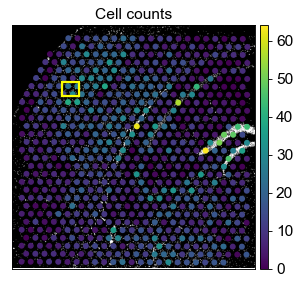

In [124]:
# save ncounts
sc.set_figure_params(facecolor="white", figsize=(8, 4))
fig, ax = plt.subplots(figsize=(8, 4))
sc.pl.spatial(
    sq.pl.extract(adata, 'features'), 
    color=['segmentation_label'], 
    bw=True, 
    title='Cell counts',
    crop_coord=(0,7272,0,7272), 
    show=False,
    ax=ax
)
# write rectangle on plot (for extract)
sf = adata.uns['spatial']['V1_Adult_Mouse_Brain_Coronal_Section_2']['scalefactors']['tissue_hires_scalef']
rect = mpl.patches.Rectangle((inset_y*sf,inset_x*sf), width=inset_sx*sf, height=inset_sy*sf, ec='yellow', lw=2, fill=False)
ax.add_patch(rect)

ax.axes.xaxis.label.set_visible(False)
ax.axes.yaxis.label.set_visible(False)

plt.savefig('figures/fluo_ncells.png', dpi=300, bbox_inches='tight')

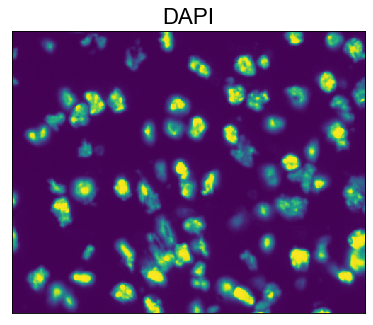

In [125]:
# save segmentation image (inset only)
a = plt.imshow(img['image'][inset_y:inset_y+inset_sy,inset_x:inset_x+inset_sx,0]/65536, interpolation='none')
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.tight_layout()
plt.title('DAPI', fontdict={'fontsize':20})
plt.savefig('figures/fluo_image.png', dpi=300, bbox_inches='tight')

<ipython-input-126-d26368978b04>:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cmap.set_under(color='black')


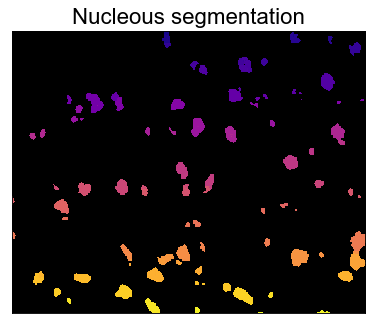

In [126]:
# save segmentation image
# color each segmented object
crop = img['segmented_watershed'][inset_y:inset_y+inset_sy,inset_x:inset_x+inset_sx].values
crop = skimage.segmentation.relabel_sequential(crop)[0]
cmap = plt.cm.plasma
cmap.set_under(color='black')
a = plt.imshow(crop, interpolation='none', cmap=cmap, vmin=0.001)
plt.grid(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.tight_layout()
plt.title('Nucleous segmentation', fontdict={'fontsize':20})
plt.savefig('figures/fluo_segmentation.png', dpi=300, bbox_inches='tight')